IMPORT LIBRARIES AND READ IN DATA

In [116]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [117]:
# read in the data set
original_data = pd.read_csv('team_stats_2003_2023.csv')
original_data.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,...,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,...,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,...,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,...,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,...,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,...,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN


CLEAN DATA

Check the number of missing values in the data set for each column. Drop columns if the number of missing values is large.

In [118]:
# find the number of missing values
original_data.isnull().sum().sort_values(ascending=False)

# remove ties and mov since they are missing for about half of the observations
dropped_columns = original_data.drop(['ties','mov'],axis=1)

# check missing values again
dropped_columns.isnull().sum().sort_values(ascending=False)

# check length of new data set
len(dropped_columns)

672

MAKE COLUMNS FOR BETTER INSIGHT

In [119]:
# make pass completion rate column
dropped_columns['pass_cmp_rate'] = dropped_columns['pass_cmp']/dropped_columns['pass_att']

# make penalties per game column
dropped_columns['penalties_per_g'] = dropped_columns['penalties']/dropped_columns['g']

# make pass attempts per game column
dropped_columns['pass_att_per_g'] = dropped_columns['pass_att']/dropped_columns['g']

# make turnovers per game column
dropped_columns['turnovers_per_g'] = dropped_columns['turnovers']/dropped_columns['g']

# make rush attempts per game column
dropped_columns['rush_att_per_g'] = dropped_columns['rush_att']/dropped_columns['g']

In [178]:
# keep only numeric columns to make histograms
hist_data = dropped_columns.select_dtypes(include='number')
len(hist_data.columns)

37

In [196]:
# THIS FUNCTION WORKS BUT IS NOT USED IN THIS NOTEBOOK #

# split the columns into groups of 4 to make plots readable
def histograms_for_every_column_in_groups_of_4(data,num_cols):
    df_groups = []
    i=0
    z=0
    while i < num_cols:
        df_g = data.iloc[:,i:i+4]
        new_name = "df_g" + str(z)
        new_name=df_g
        df_groups.append(new_name)
        i = i + 4
        z = z + 1
    for df in df_groups:
        df.hist(edgecolor='black',grid=False)

CHECK DISTRIBUTIONS

In [215]:
# keep only the identified indicators
filter_for_hist = dropped_columns[['yds_per_play_offense','turnovers_per_g','pass_att_per_g','pass_net_yds_per_att',
                                  'rush_att_per_g','rush_yds_per_att','penalties_per_g','pass_cmp_rate']]

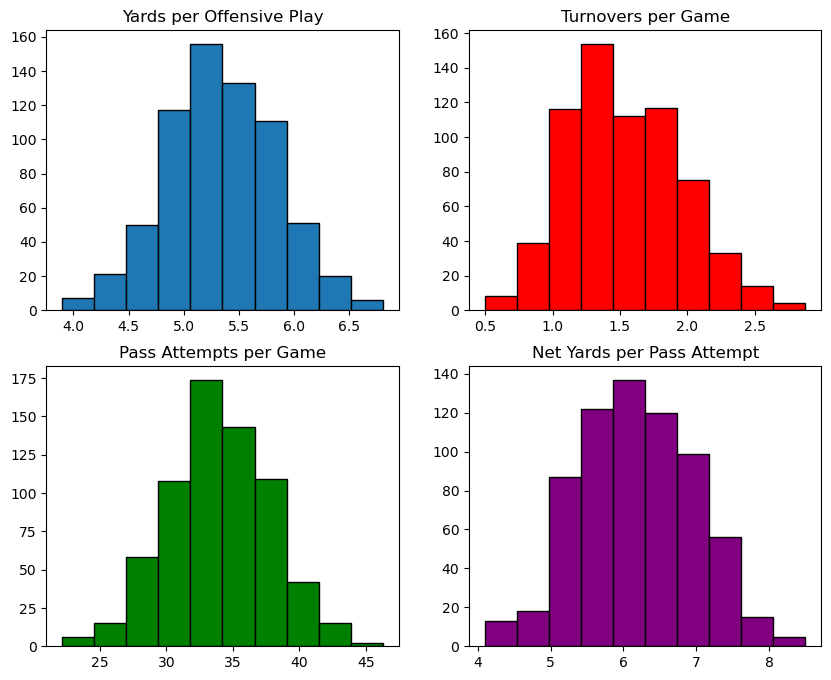

In [210]:
# make histogram subplots
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
ax[0,0].set_title('Yards per Offensive Play')
ax[0,0].hist(dropped_columns['yds_per_play_offense'],edgecolor='black')

ax[0,1].set_title('Turnovers per Game')
ax[0,1].hist(dropped_columns['turnovers_per_g'],edgecolor='black',color='red')


ax[1,0].set_title('Pass Attempts per Game')
ax[1,0].hist(dropped_columns['pass_att_per_g'],edgecolor='black',color='green')

ax[1,1].set_title('Net Yards per Pass Attempt')
ax[1,1].hist(dropped_columns['pass_net_yds_per_att'],edgecolor='black',color='purple')
plt.show()

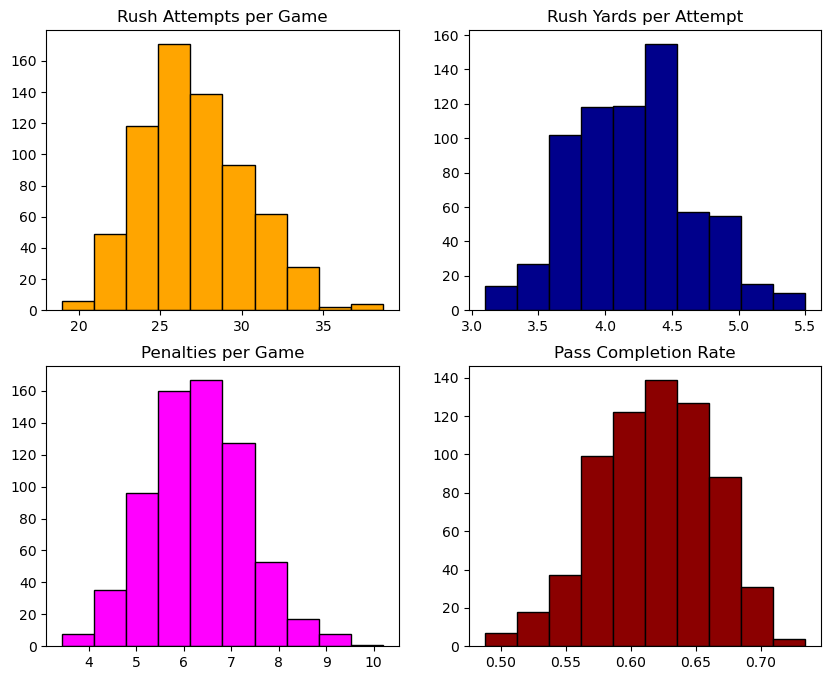

In [214]:
# make histogram subplots
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
ax[0,0].set_title('Rush Attempts per Game')
ax[0,0].hist(dropped_columns['rush_att_per_g'],edgecolor='black',color='orange')

ax[0,1].set_title('Rush Yards per Attempt')
ax[0,1].hist(dropped_columns['rush_yds_per_att'],edgecolor='black',color='darkblue')


ax[1,0].set_title('Penalties per Game')
ax[1,0].hist(dropped_columns['penalties_per_g'],edgecolor='black',color='magenta')

ax[1,1].set_title('Pass Completion Rate')
ax[1,1].hist(dropped_columns['pass_cmp_rate'],edgecolor='black',color='darkred')
plt.show()

Q1: What are the correlations between wins and important aspects of the game?

Make a subplot of four out of the eight aspects of the game.

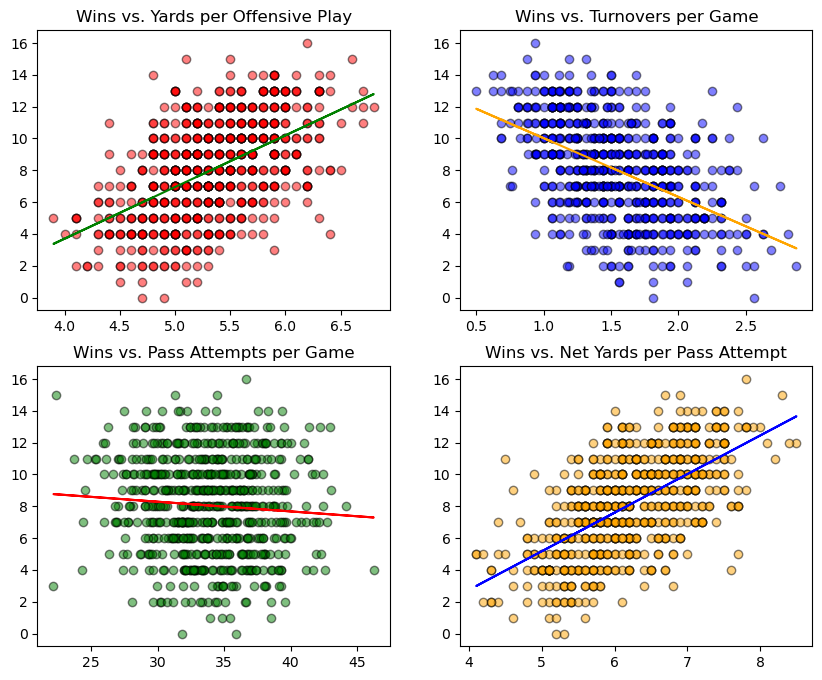

In [244]:
# make scatter plot with trend line sublots
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
ax[0,0].scatter(dropped_columns['yds_per_play_offense'],dropped_columns['wins'],color='red',alpha=0.5,edgecolor='black')
ax[0,0].set_title('Wins vs. Yards per Offensive Play')
z = np.polyfit(dropped_columns['yds_per_play_offense'], dropped_columns['wins'], 1)
p = np.poly1d(z)
ax[0,0].plot(dropped_columns['yds_per_play_offense'],p(dropped_columns['yds_per_play_offense']),color='green')

ax[0,1].scatter(dropped_columns['turnovers_per_g'],dropped_columns['wins'],color='blue',alpha=0.5,edgecolor='black')
ax[0,1].set_title('Wins vs. Turnovers per Game')
z = np.polyfit(dropped_columns['turnovers_per_g'], dropped_columns['wins'], 1)
p = np.poly1d(z)
ax[0,1].plot(dropped_columns['turnovers_per_g'],p(dropped_columns['turnovers_per_g']),color = "orange")

ax[1,0].scatter(dropped_columns['pass_att_per_g'],dropped_columns['wins'],color='green',alpha=0.5,edgecolor='black')
ax[1,0].set_title('Wins vs. Pass Attempts per Game')
z = np.polyfit(dropped_columns['pass_att_per_g'], dropped_columns['wins'], 1)
p = np.poly1d(z)
ax[1,0].plot(dropped_columns['pass_att_per_g'],p(dropped_columns['pass_att_per_g']),color = 'red')

ax[1,1].scatter(dropped_columns['pass_net_yds_per_att'],dropped_columns['wins'],color='orange',alpha=0.5,edgecolor='black')
ax[1,1].set_title('Wins vs. Net Yards per Pass Attempt')
z = np.polyfit(dropped_columns['pass_net_yds_per_att'], dropped_columns['wins'], 1)
p = np.poly1d(z)
ax[1,1].plot(dropped_columns['pass_net_yds_per_att'],p(dropped_columns['pass_net_yds_per_att']),color='blue')
plt.show()

Make a subplot of four out of the eight aspects of the game.

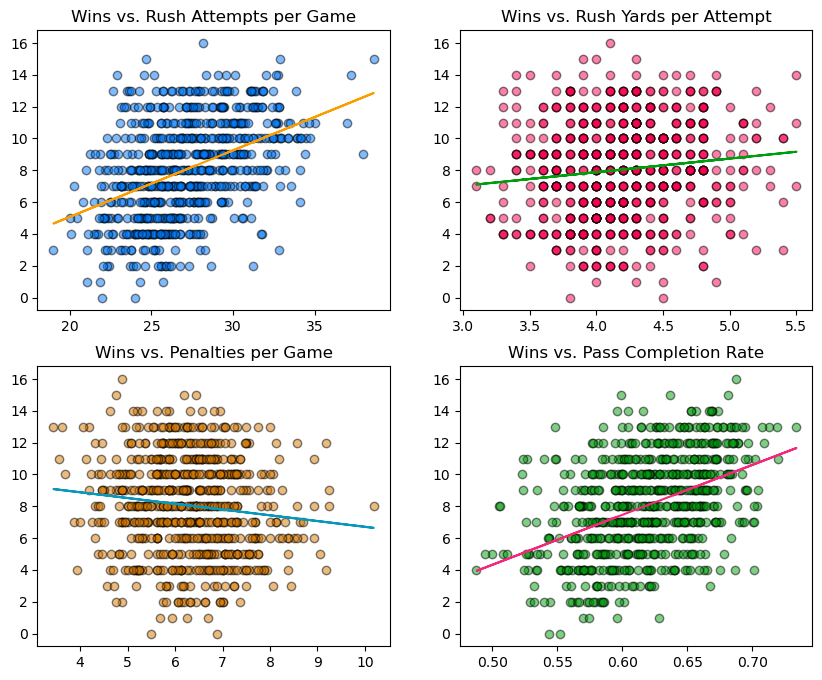

In [260]:
# make scatter plot with trend line sublots
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
ax[0,0].scatter(dropped_columns['rush_att_per_g'],dropped_columns['wins'],color='#0079FA',alpha=0.5,edgecolor='black')
ax[0,0].set_title('Wins vs. Rush Attempts per Game')
z = np.polyfit(dropped_columns['rush_att_per_g'], dropped_columns['wins'], 1)
p = np.poly1d(z)
ax[0,0].plot(dropped_columns['rush_att_per_g'],p(dropped_columns['rush_att_per_g']),color='#FA9E00')

ax[0,1].scatter(dropped_columns['rush_yds_per_att'],dropped_columns['wins'],color='#FA014E',alpha=0.5,edgecolor='black')
ax[0,1].set_title('Wins vs. Rush Yards per Attempt')
z = np.polyfit(dropped_columns['rush_yds_per_att'], dropped_columns['wins'], 1)
p = np.poly1d(z)
ax[0,1].plot(dropped_columns['rush_yds_per_att'],p(dropped_columns['rush_yds_per_att']),color='#009E0D')

ax[1,0].scatter(dropped_columns['penalties_per_g'],dropped_columns['wins'],color='#D67700',alpha=0.5,edgecolor='black')
ax[1,0].set_title('Wins vs. Penalties per Game')
z = np.polyfit(dropped_columns['penalties_per_g'], dropped_columns['wins'], 1)
p = np.poly1d(z)
ax[1,0].plot(dropped_columns['penalties_per_g'],p(dropped_columns['penalties_per_g']),color="#0997BB")

ax[1,1].scatter(dropped_columns['pass_cmp_rate'],dropped_columns['wins'],color='#009E0D',alpha=0.5,edgecolor='black')
ax[1,1].set_title('Wins vs. Pass Completion Rate')
z = np.polyfit(dropped_columns['pass_cmp_rate'], dropped_columns['wins'], 1)
p = np.poly1d(z)
ax[1,1].plot(dropped_columns['pass_cmp_rate'],p(dropped_columns['pass_cmp_rate']),color='#F4287B')
plt.show()

THESE ARE THE OTIGINAL SCATTER PLOTS

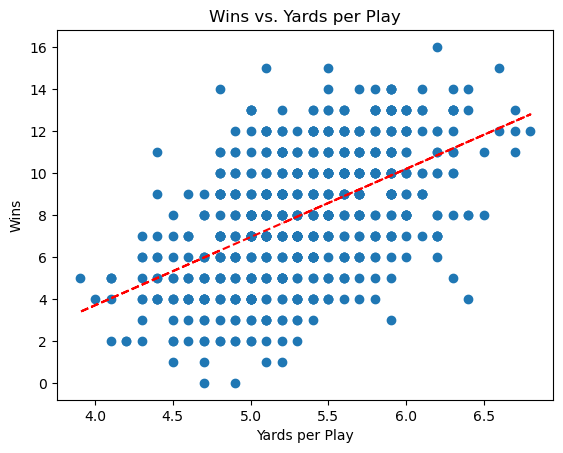

In [123]:
y = dropped_columns['wins']
x = dropped_columns['yds_per_play_offense']

# plots the scatter plot
plt.scatter(x,y)

# creates the trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# add labels
plt.xlabel('Yards per Play')
plt.ylabel('Wins')
plt.title('Wins vs. Yards per Play')

plt.show()

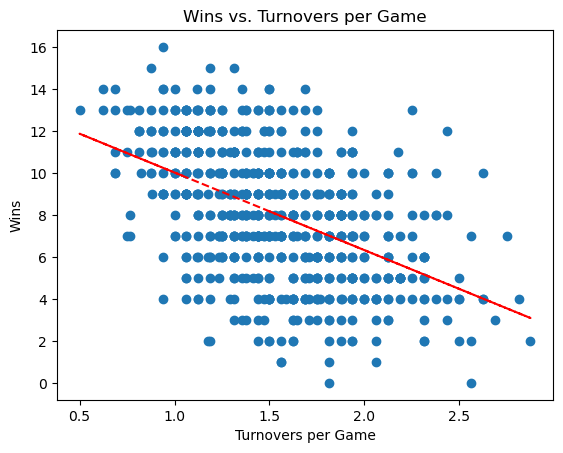

In [124]:
y = dropped_columns['wins']
x = dropped_columns['turnovers_per_g']

# plots the scatter plot
plt.scatter(x,y)

# creates the trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# add labels
plt.xlabel('Turnovers per Game')
plt.ylabel('Wins')
plt.title('Wins vs. Turnovers per Game')

plt.show()

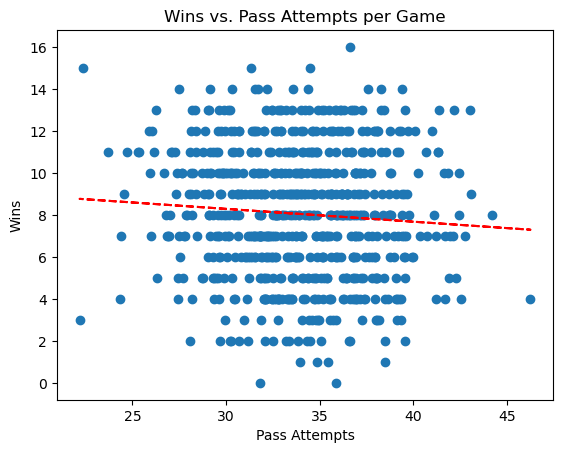

In [125]:
x = dropped_columns['pass_att_per_g']
y = dropped_columns['wins']

# plots the scatter plot
plt.scatter(x,y)

# creates the trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# add labels
plt.xlabel('Pass Attempts')
plt.ylabel('Wins')
plt.title('Wins vs. Pass Attempts per Game')

plt.show()

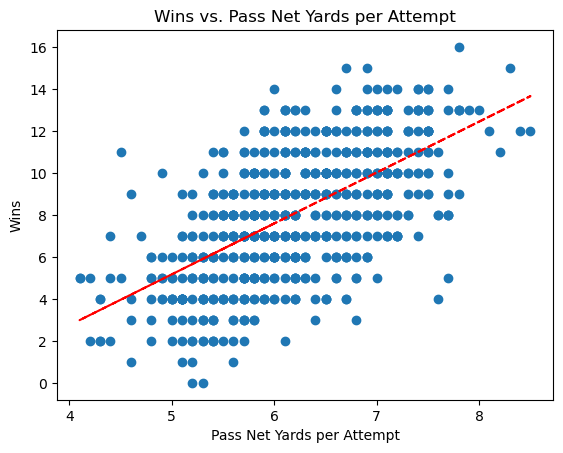

In [126]:
x = dropped_columns['pass_net_yds_per_att']
y = dropped_columns['wins']

# plots the scatter plot
plt.scatter(x,y)

# creates the trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# add labels
plt.xlabel('Pass Net Yards per Attempt')
plt.ylabel('Wins')
plt.title('Wins vs. Pass Net Yards per Attempt')

plt.show()

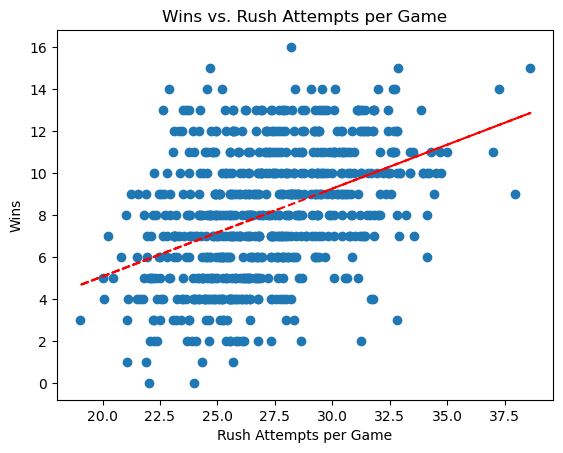

In [127]:
x = dropped_columns['rush_att_per_g']
y = dropped_columns['wins']

# plots the scatter plot
plt.scatter(x,y)

# creates the trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# add labels
plt.xlabel('Rush Attempts per Game')
plt.ylabel('Wins')
plt.title('Wins vs. Rush Attempts per Game')

plt.show()

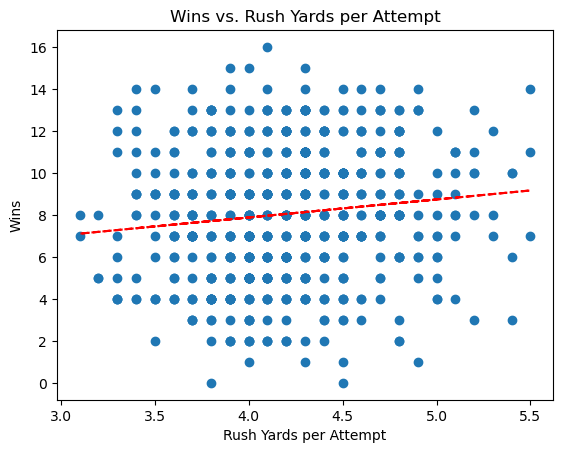

In [128]:
x = dropped_columns['rush_yds_per_att']
y = dropped_columns['wins']

# plots the scatter plot
plt.scatter(x,y)

# creates the trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# add labels
plt.xlabel('Rush Yards per Attempt')
plt.ylabel('Wins')
plt.title('Wins vs. Rush Yards per Attempt')

plt.show()

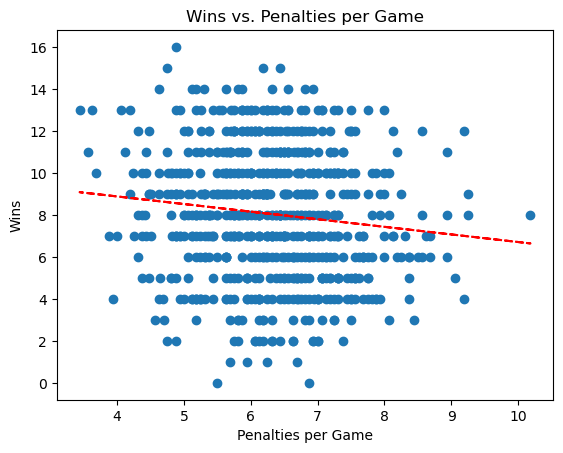

In [129]:
x = dropped_columns['penalties_per_g']
y = dropped_columns['wins']

# plots the scatter plot
plt.scatter(x,y)

# creates the trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# add labels
plt.xlabel('Penalties per Game')
plt.ylabel('Wins')
plt.title('Wins vs. Penalties per Game')

plt.show()

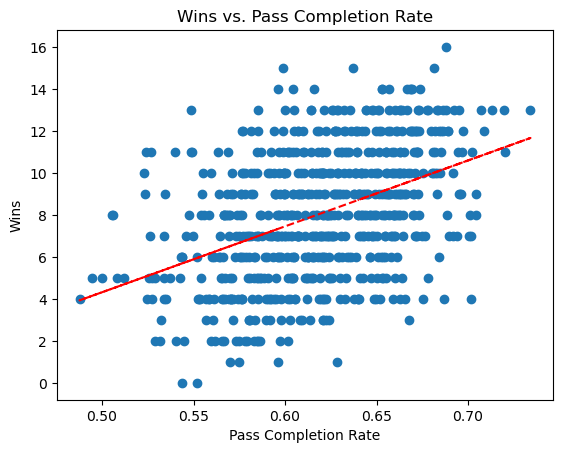

In [130]:
x = dropped_columns['pass_cmp_rate']
y = dropped_columns['wins']

# plots the scatter plot
plt.scatter(x,y)

# creates the trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

# add labels
plt.xlabel('Pass Completion Rate')
plt.ylabel('Wins')
plt.title('Wins vs. Pass Completion Rate')

plt.show()

Q2: What teams have been winning the most in recent years?

To answer this we will need to find the win loss percentage of each team for each year. And to make the plot readable, let's separate the teams by their division. 

In [131]:
plot_data = dropped_columns[['team','year','win_loss_perc']]

# AFC
afc_east = plot_data[plot_data['team'].isin(['Buffalo Bills','Miami Dolphins','New York Jets','New England Patriots'])]
afc_north = plot_data[plot_data['team'].isin(['Baltimore Ravens','Cleveland Browns','Pittsburgh Steelers','Cincinnati Bengals'])]
afc_south = plot_data[plot_data['team'].isin(['Houston Texans','Jacksonville Jaguars','Indianapolis Colts',
                                              'Tennessee Titans'])]
afc_west = plot_data[plot_data['team'].isin(['Kansas City Chiefs','Las Vegas Raiders','Denver Broncos','Los Angeles Chargers'])]

# NFC
nfc_east = plot_data[plot_data['team'].isin(['Dallas Cowboys','Philadelphia Eagles','New York Giants','Washington Commanders'])]
nfc_north = plot_data[plot_data['team'].isin(['Detroit Lions','Green Bay Packers','Minnesota Vikings','Chicago Bears'])]
nfc_south = plot_data[plot_data['team'].isin(['Tampa Bay Buccaneers','New Orleans Saints','Atlanta Falcons','Carolina Panthers'])]
nfc_west = plot_data[plot_data['team'].isin(['San Francisco 49ers','Los Angeles Rams','Seattle Seahawks','Arizona Cardinals'])]

Define function to plot the win loss percentage  over time easily.

In [132]:
# I used ChatGPT here to make different line styles and colors for each category
def line_graph_win_loss_by_team(data, division_name,_listcolors):
    fig, ax = plt.subplots(figsize=(10, 8))
    line_styles = ['-', '--', '-.', ':',(0, (3, 1, 1, 1))]  # Define different line styles
    colors = _listcolors
    style_index = 0  # Index to cycle through line styles
    color_index = 0
    for label, grp in data.groupby('team'):
        # Plotting with the specified line style
        grp.plot(x='year', y='win_loss_perc', ax=ax, label=label, linestyle=line_styles[style_index],color=colors[color_index],alpha=0.75)
        style_index = (style_index + 1) % len(line_styles)  # Cycle through line styles
        color_index = (color_index + 1) % len(colors)
    ax.set_xlabel('Year')
    ax.set_ylabel('Win Loss %')
    ax.set_title('Win Loss Percentage Over Time for the ' + division_name)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

Plot the AFC.

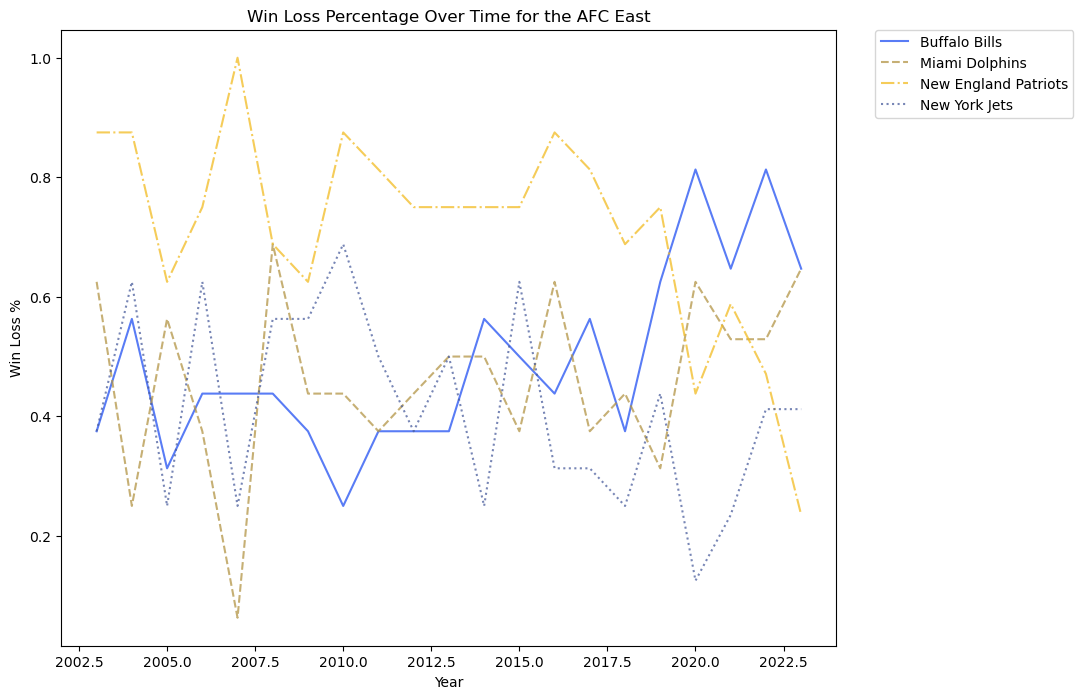

In [133]:
line_graph_win_loss_by_team(afc_east,'AFC East',['#2250F2','#B39546','#F2BB22','#4A5D9D'])

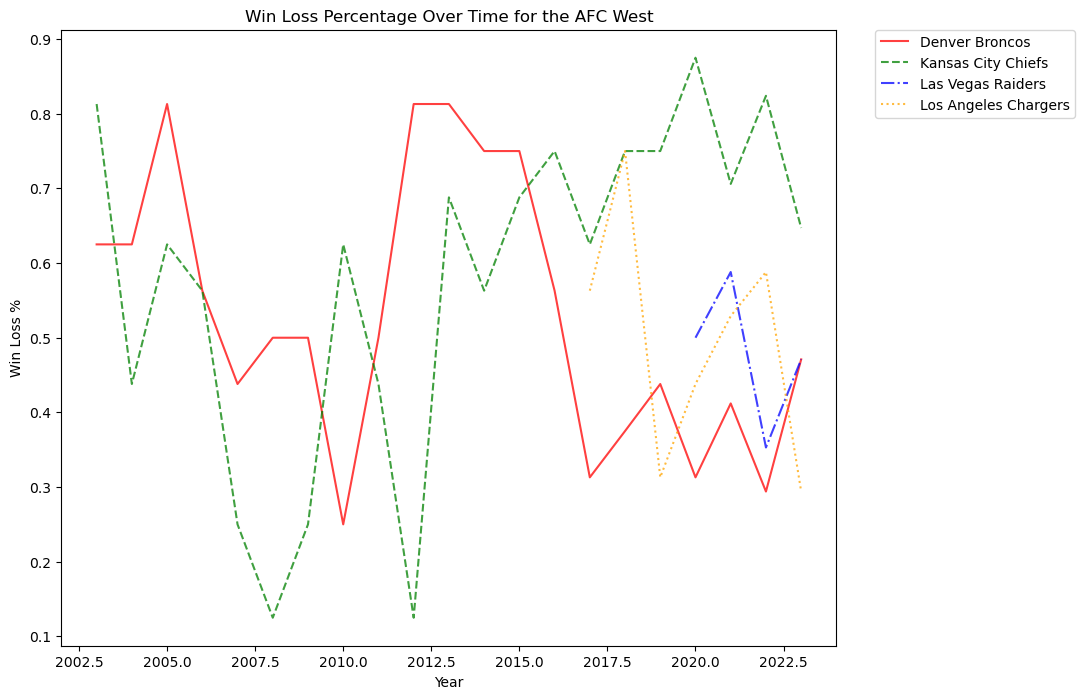

In [134]:
line_graph_win_loss_by_team(afc_west,'AFC West',['red','green','blue','orange'])

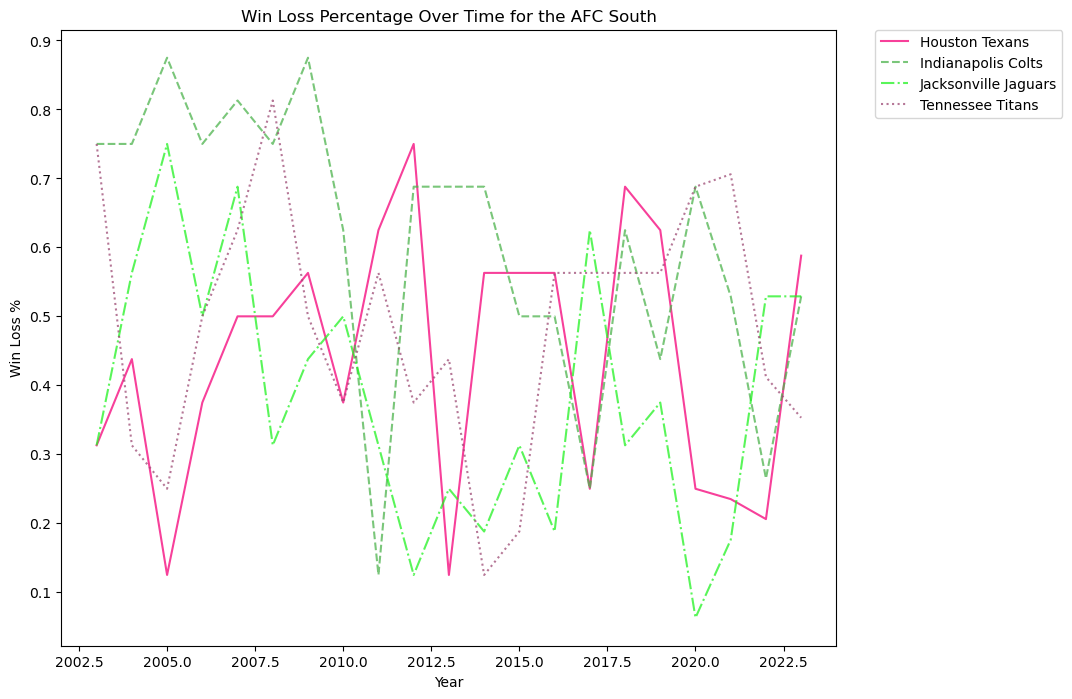

In [135]:
line_graph_win_loss_by_team(afc_south,'AFC South',['#F50079','#4DB34D','#22F222','#9D4A74'])

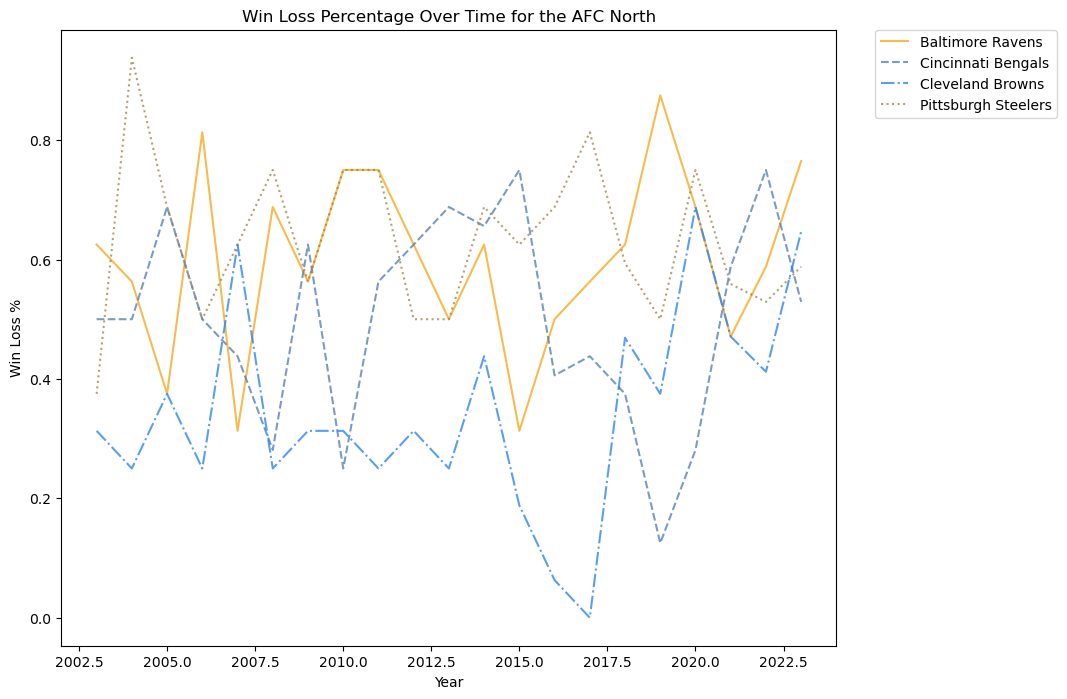

In [136]:
line_graph_win_loss_by_team(afc_north,'AFC North',['#F5A512','#4D7AB3','#227EF2','#9D804A'])

Plot the NFC.

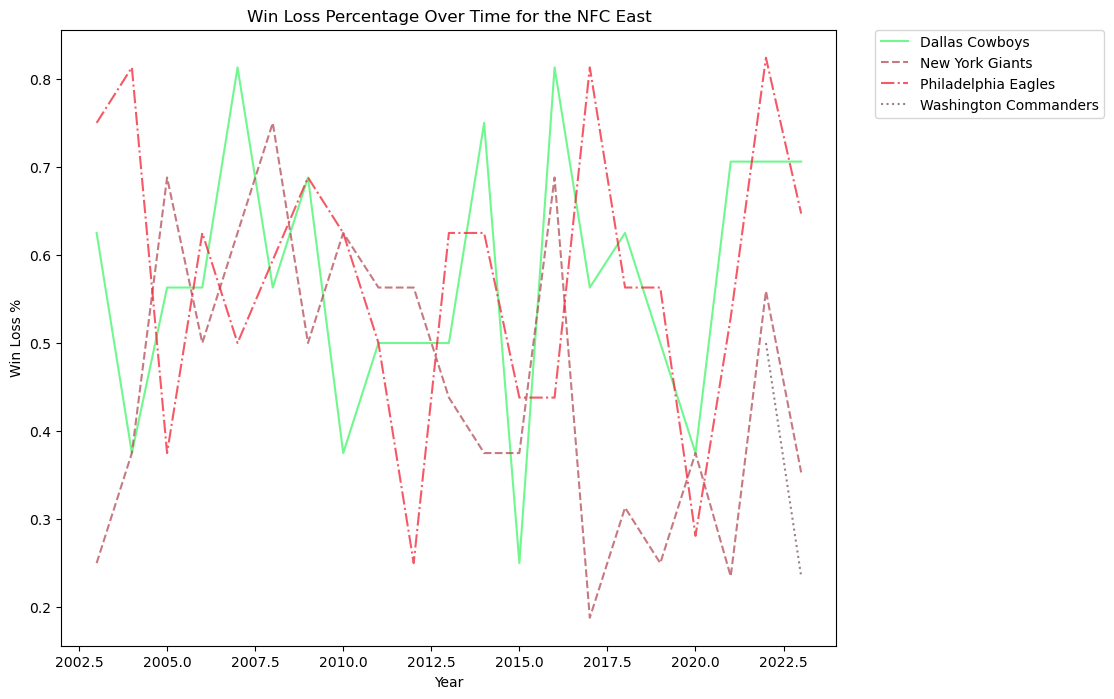

In [137]:
line_graph_win_loss_by_team(nfc_east,'NFC East',['#40F569','#B34D56','#F22234','#75585B'])

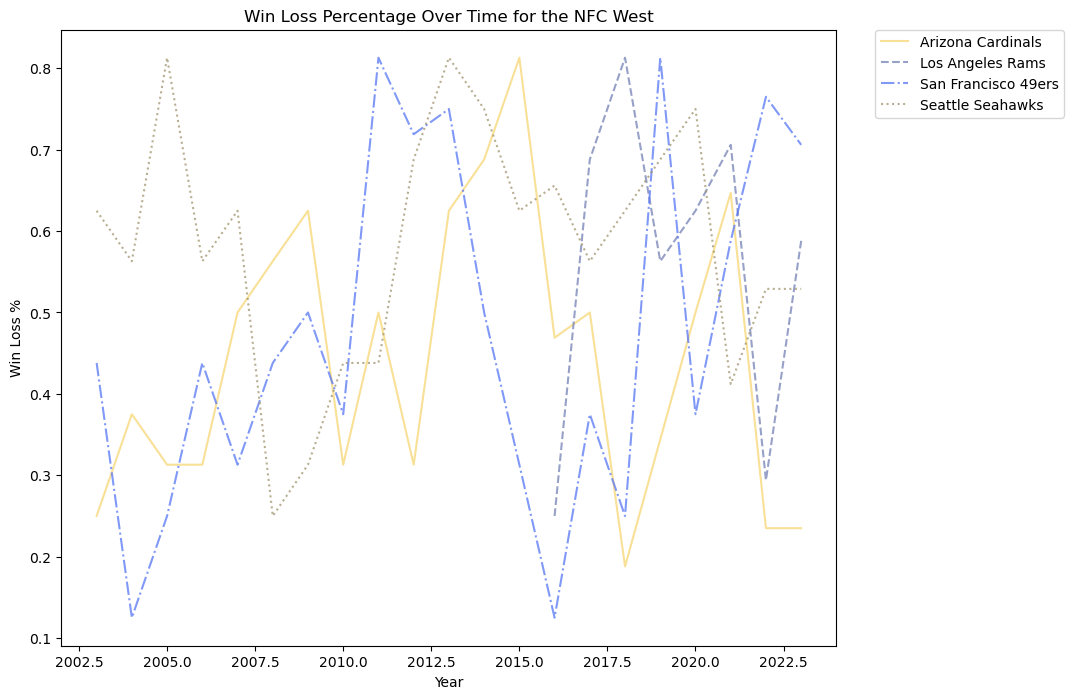

In [138]:
line_graph_win_loss_by_team(nfc_west,'NFC West',['#F7D674','#7481B5','#5676F4','#A0936D'])

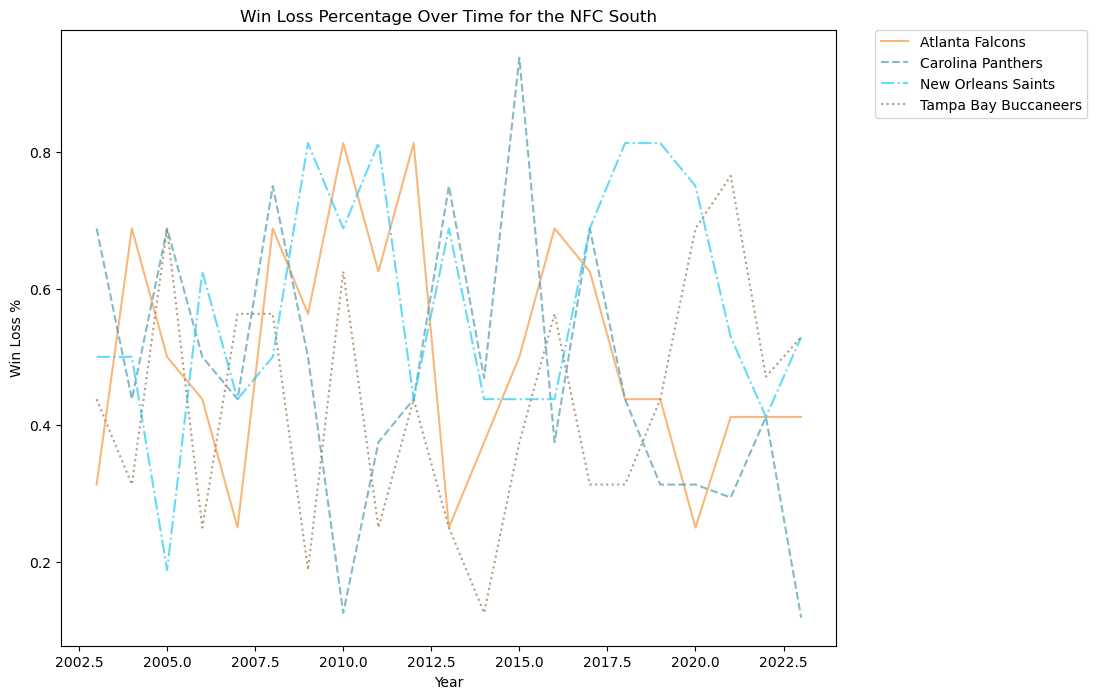

In [139]:
line_graph_win_loss_by_team(nfc_south,'NFC South',['#F7A04F','#59A3B5','#32CEF5','#A07955'])

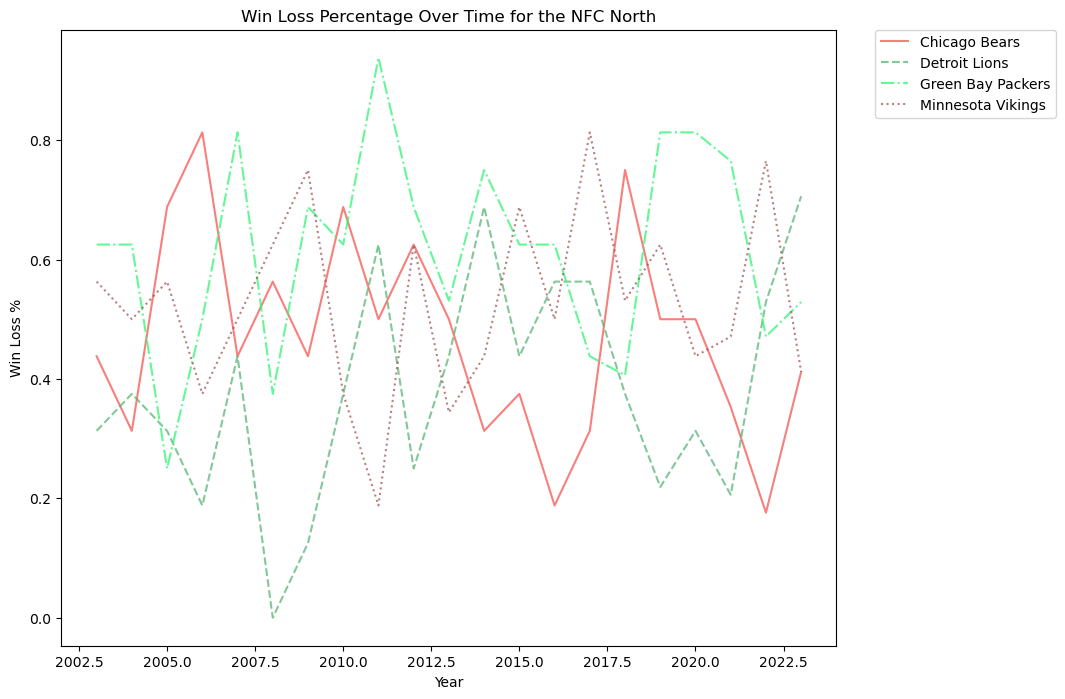

In [140]:
line_graph_win_loss_by_team(nfc_north,'NFC North',['#F7544F','#59B577','#30F573','#A05755'])

Q3: How are the winning teams performing on the important aspects of the game identified earlier? 

In [141]:
# make list of winning teams in recent history
winning_teams = ['Buffalo Bills','Kansas City Chiefs','Baltimore Ravens','Detroit Lions','Dallas Cowboys','Philadelphia Eagles','San Francisco 49ers']

# filter for only the winning teams
filtered_for_winning = dropped_columns[(dropped_columns['team'].isin(winning_teams)) & (dropped_columns['year']>2021)]

# get head of the data
filtered_for_winning.head()

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,g,total_yards,...,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,pass_cmp_rate,penalties_per_g,pass_att_per_g,turnovers_per_g,rush_att_per_g
608,2022,Buffalo Bills,13,3,0.813,455,286,169,16,6361,...,709,27,45.0,15.2,157.46,0.628920,5.750000,35.875000,1.687500,26.875000
613,2022,Baltimore Ravens,10,7,0.588,350,315,35,17,5760,...,678,21,38.9,11.7,48.17,0.614754,4.823529,28.705882,1.235294,30.941176
620,2022,Kansas City Chiefs,14,3,0.824,496,369,127,17,7032,...,838,31,46.4,10.1,281.00,0.668203,5.117647,38.294118,1.352941,24.529412
624,2022,Philadelphia Eagles,14,3,0.824,477,344,133,17,6614,...,682,29,42.5,10.2,226.96,0.652985,5.294118,31.529412,1.117647,32.000000
625,2022,Dallas Cowboys,12,5,0.706,467,342,125,17,6034,...,842,24,41.5,10.8,112.34,0.638489,6.117647,32.705882,1.352941,31.235294


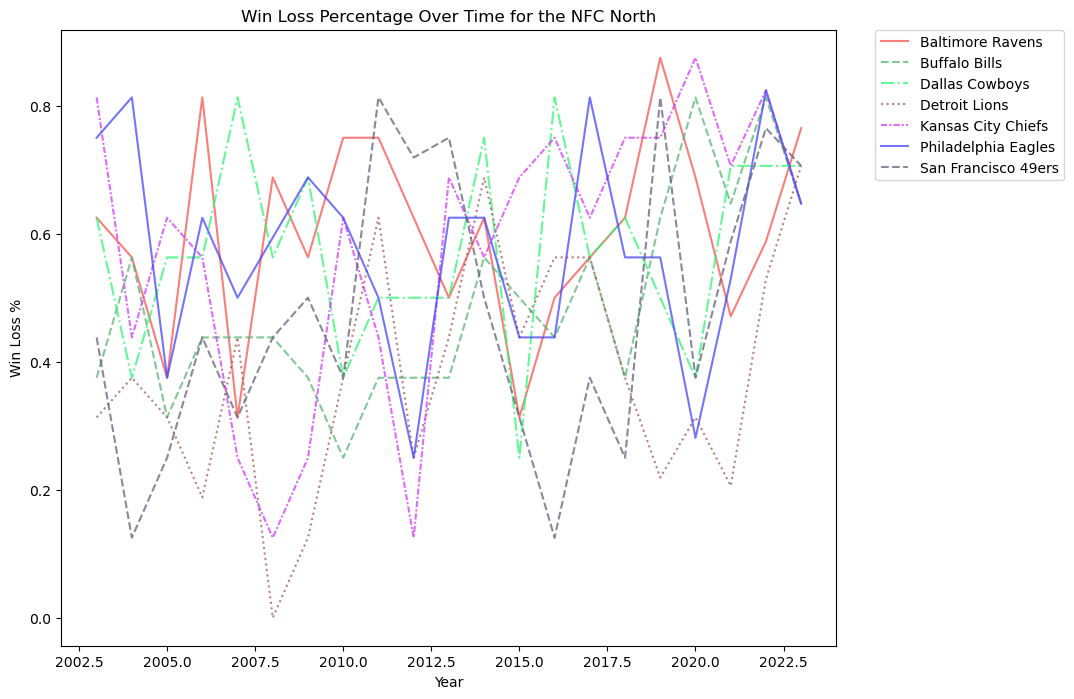

In [142]:
for_winning_graph = dropped_columns[(dropped_columns['team'].isin(winning_teams))]

line_graph_win_loss_by_team(for_winning_graph,'NFC North',['#F7544F','#59B577','#30F573','#A05755','#D33BFA','#4846FA','#616178'])

MAKE BAR GRAPHS FOR EACH VARIABLE BY COLORED TEAM

In [220]:
# define function for making bar plot for given y value by team
import seaborn as sns
def bar_plot_by_team(data,y_value_name,y_label):
    ax = sns.barplot(x='team', y=y_value_name, data=data, hue='team', dodge=False)
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('Team')
    plt.ylabel(y_label)
    plt.title(y_label)

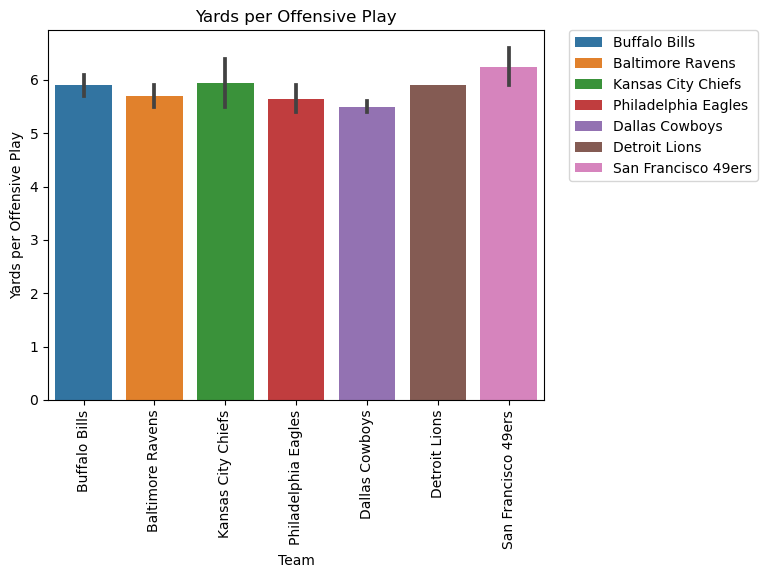

In [229]:
# bar plot for yards per play on offense
bar_plot_by_team(filtered_for_winning,'yds_per_play_offense','Yards per Offensive Play')

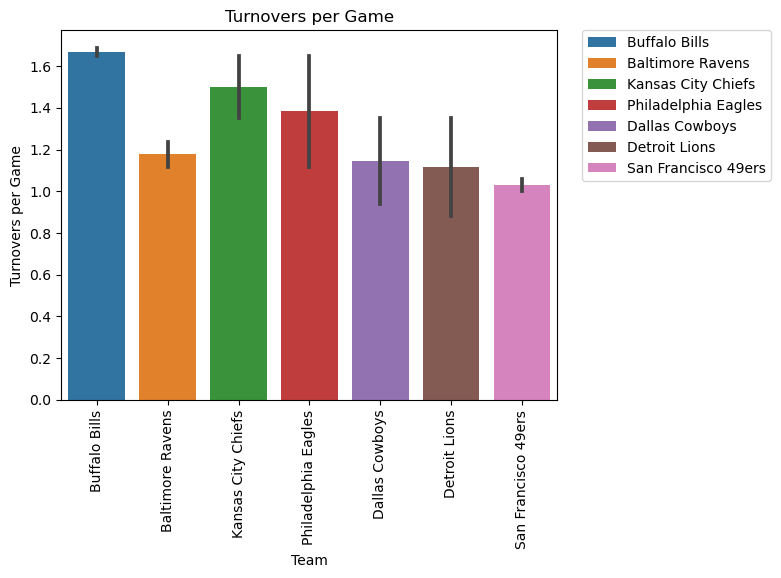

In [222]:
# bar plot for turnovers
bar_plot_by_team(filtered_for_winning,'turnovers_per_g','Turnovers per Game')

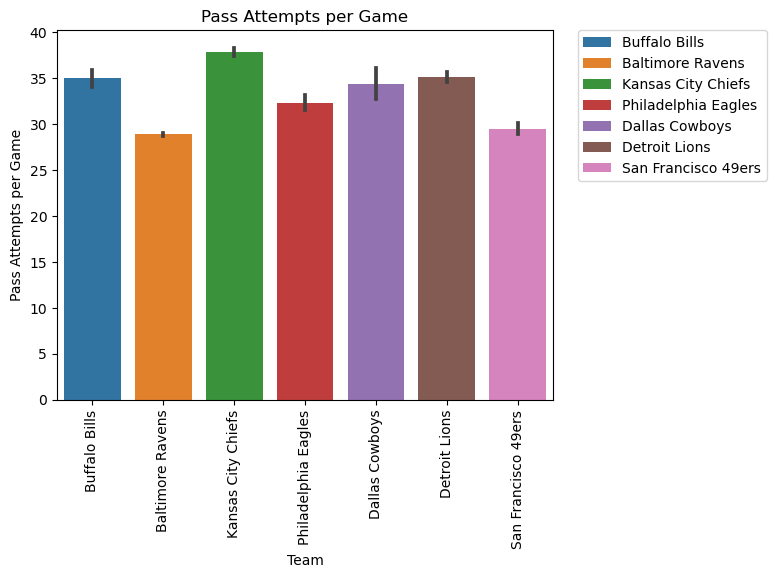

In [223]:
# bar plot for pass attempts
bar_plot_by_team(filtered_for_winning,'pass_att_per_g','Pass Attempts per Game')

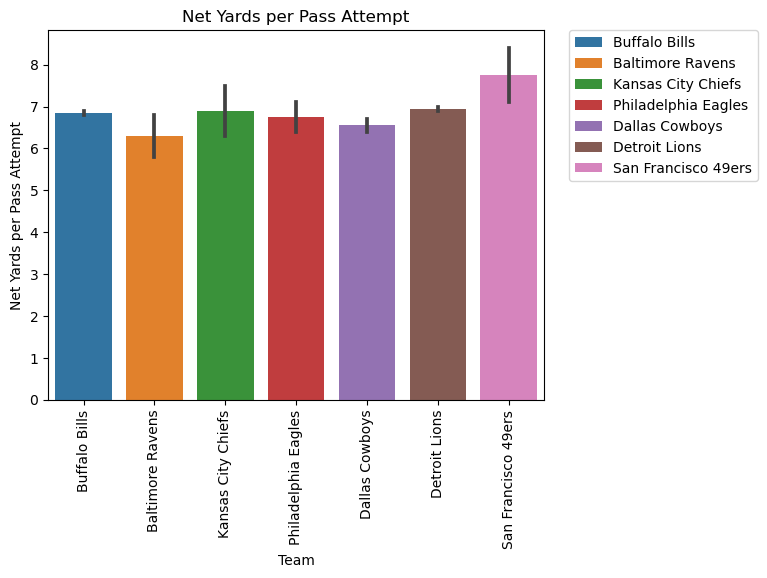

In [224]:
# bar plot for pass net yards per pass attempt
bar_plot_by_team(filtered_for_winning,'pass_net_yds_per_att','Net Yards per Pass Attempt')

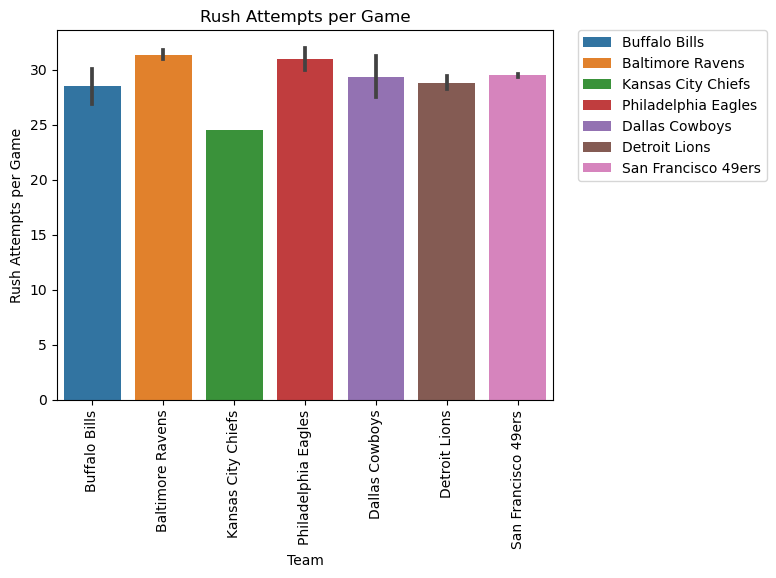

In [225]:
# bar plot for rush attempts
bar_plot_by_team(filtered_for_winning,'rush_att_per_g','Rush Attempts per Game')

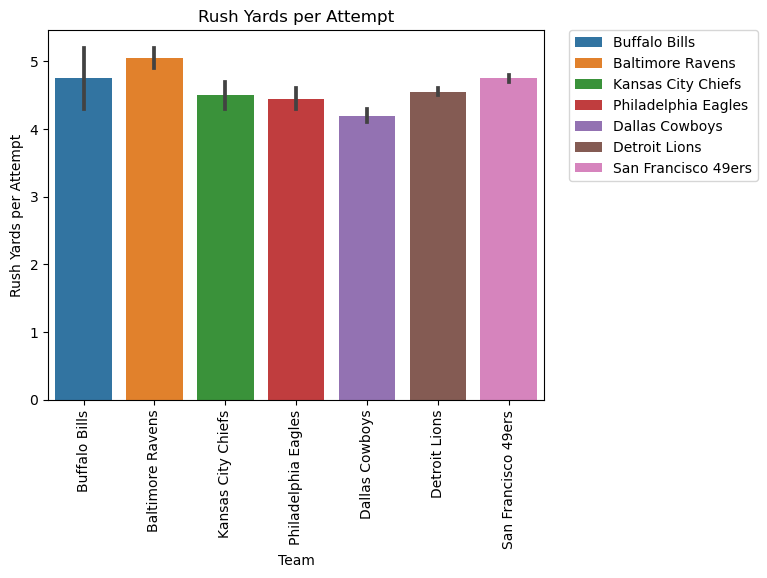

In [226]:
# bar plot for rush yards per attempt
bar_plot_by_team(filtered_for_winning,'rush_yds_per_att','Rush Yards per Attempt')

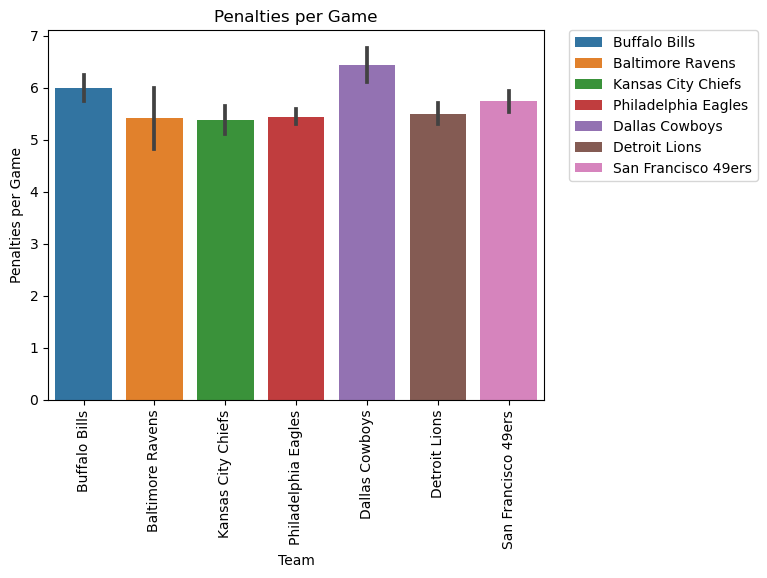

In [227]:
# bar plot for penalties
bar_plot_by_team(filtered_for_winning,'penalties_per_g','Penalties per Game')

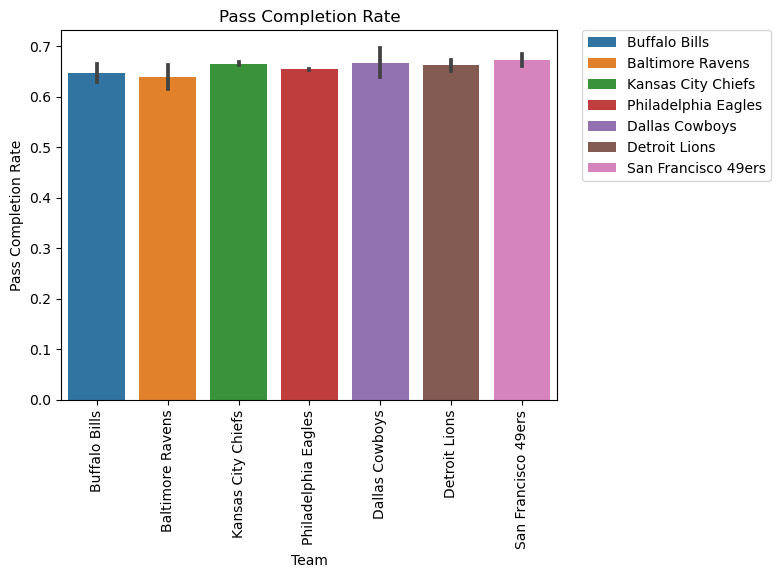

In [228]:
# bar plot for pass completion rate
bar_plot_by_team(filtered_for_winning,'pass_cmp_rate','Pass Completion Rate')